# Introducción a la Ciencia de Datos 
## Notebook de práctica en clase

### Clase 05 

Importamos las librerias que se van a utilizar

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importamos los datos objeto del análisis y los visualizamos

In [11]:
DATOS = pd.read_csv(r'train.csv')

In [13]:
print (DATOS) 

     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     fare cabin embarked  
0      male

## 1 Inspección y exploración de datos 

Se utiliza ls función .duplicated() de pandas para identificar los valores que se repiten

In [23]:
print (df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


Se revisa la información que contiene el dataset

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


A partir de la información anterior, podemos ver que Edad y Cabina tienen un número desigual de recuentos. Además, algunas de las columnas son categóricas y tienen tipo de dato objeto, mientras que otras son de tipo entero y flotante. Veamos la estructura descriptiva de los datos usando df.describe().

In [34]:
print (df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Para revisar las columnas categoricas y numéricas se utiliza la función [col]

In [38]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['name', 'sex', 'ticket', 'cabin', 'embarked']
Numerical columns : ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


Para revisar el número total de valores en las colpumnas categóricas se usa la función  .unique()

In [41]:
df[cat_col].nunique()

name        891
sex           2
ticket      681
cabin       147
embarked      3
dtype: int64

## 2. Remover observaciones no deseadas 

Esto incluye eliminar valores duplicados, redundantes o irrelevantes de tu conjunto de datos. Las observaciones duplicadas surgen con mayor frecuencia durante la recolección de datos y las observaciones irrelevantes son aquellas que no se ajustan al problema específico que estás tratando de resolver.

Las observaciones redundantes alteran la eficiencia en gran medida, ya que los datos se repiten y pueden sumar hacia el lado correcto o incorrecto, produciendo resultados poco fiables. Las observaciones irrelevantes son cualquier tipo de datos que no nos son útiles y pueden eliminarse directamente. Ahora tenemos que tomar una decisión según el tema de análisis, sobre qué factor es importante para nuestra discusión. Como sabemos, nuestras máquinas no entienden los datos de texto. Por lo tanto, tenemos que eliminar o convertir los valores de las columnas categóricas en tipos numéricos. Aquí estamos eliminando las columnas de Nombre porque el Nombre siempre será único y no tiene una gran influencia en las variables objetivo. Para el ticket, primero imprimamos los 50 tickets únicos.

In [46]:
df['ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

A partir de los tickets anteriores, podemos observar que están compuestos por dos partes, como el primer valor ‘A/5 21171’, que es una combinación de ‘A/5’ y ‘21171’. Esto puede influir en nuestras variables objetivo. Será un caso de Ingeniería de Características, donde derivamos nuevas características a partir de una columna o un grupo de columnas. En el caso actual, estamos eliminando las columnas ‘Nombre’ y ‘Ticket’.

Descartamos los atributos de nombre y ticket con la función .drop()

In [49]:
df1 = df.drop(columns=['name','ticket'])
print(df1.shape)

(891, 9)


## 3. Manejo de datos faltantes 

Los datos faltantes son un problema común en los conjuntos de datos del mundo real y pueden ocurrir por diversas razones, como errores humanos, fallos del sistema o problemas de recolección de datos. Se pueden utilizar varias técnicas para manejar los datos faltantes, como la imputación, eliminación o sustitución.

Vamos a comprobar el porcentaje de valores faltantes por columnas para cada fila usando df.isnull(), que verifica si los valores son nulos o no y devuelve valores booleanos. Luego, .sum() sumará el número total de filas con valores nulos y lo dividiremos por el número total de filas presentes en el conjunto de datos, y luego multiplicamos para obtener los valores en porcentaje, es decir, por cada 100 valores, cuántos son nulos.


In [57]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

survived     0.00
pclass       0.00
sex          0.00
age         19.87
sibsp        0.00
parch        0.00
fare         0.00
cabin       77.10
embarked     0.22
dtype: float64

No podemos simplemente ignorar o eliminar las observaciones faltantes. Deben manejarse con cuidado, ya que pueden ser una indicación de algo importante.

Las dos formas más comunes de tratar los datos faltantes son:1. 

Eliminar observaciones con valores faltant* es.
El hecho de que el valor esté faltante puede ser informativo en sí mi* smo.
Además, en el mundo real, a menudo necesitas hacer predicciones con nuevos datos, incluso si algunas de las características están faltantes.

Como podemos ver en el resultado anterior, la columna Cabina tiene un 77% de valores nulos, Edad tiene un 19.87% y Embarque tiene un 0.22% de valores nulos. Por lo tanto, no es una buena idea llenar el 77% de valores nulos. Así que eliminaremos la columna Cabina. La columna Embarque tiene solo un 0.22% de valores nulos, por lo que eliminaremos las filas con valores nulos de la columna Embarque.

In [60]:
print("Before: ", df1.shape)
df2 = df1.drop(columns='cabin')
df2.dropna(subset=['embarked'], axis=0, inplace=True)
print("After: ", df2.shape)

Before:  (891, 9)
After:  (889, 8)


2. Imputar los valores faltantes a partir de observaciones pasadas.

Nuevamente, la ‘ausencia’ casi siempre es informativa en sí misma, y deberías indicarle a tu algoritmo si un valor estaba ausente. Incluso si construyes un modelo para imputar tus valores, no estás agregando ninguna información real. Solo estás reforzando los patrones ya proporcionados por otras características. A partir de la tabla descriptiva anterior, podemos ver que hay muy poca diferencia entre la media y la mediana, es decir, 29.6 y 28. Por lo tanto, aquí podemos hacer una imputación de la media o de la mediana.

Nota: La imputación de la media es adecuada cuando los datos están distribuidos normalmente y no tienen valores atípicos extremos. La imputación de la mediana es preferible cuando los datos contienen valores atípicos o están sesgados.

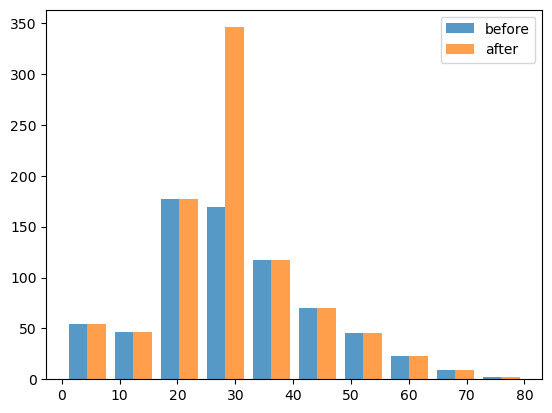

In [65]:
# Mean imputation
df3 = df2.fillna(df2.age.mean())
# Let's check the null values again
df3.isnull().sum()

plt.hist([df2.age,df3.age], alpha=0.75, label=['before','after'])
plt.legend(loc='upper right')
plt.show()

## "4. Manejo de valores atípicos: 

Los valores atípicos son valores extremos que se desvían significativamente de la mayoría de los datos. Pueden afectar negativamente el análisis y el rendimiento del modelo. Se pueden utilizar técnicas como la agrupación, la interpolación o la transformación para manejar los valores atípicos.

Para verificar los valores atípicos, generalmente usamos un diagrama de caja. Un diagrama de caja, también conocido como diagrama de caja y bigotes, es una representación gráfica de la distribución de un conjunto de datos. Muestra la mediana de una variable, los cuartiles y los posibles valores atípicos. La línea dentro de la caja denota la mediana, mientras que la caja en sí denota el rango intercuartil (IQR). Los bigotes se extienden hasta los valores no atípicos más extremos dentro de 1.5 veces el IQR. Los puntos individuales más allá de los bigotes se consideran posibles valores atípicos. Un diagrama de caja ofrece una visión general fácil de entender del rango de los datos y permite identificar valores atípicos o sesgos en la distribución.

Vamos a trazar el diagrama de caja para los datos de la columna Ead."



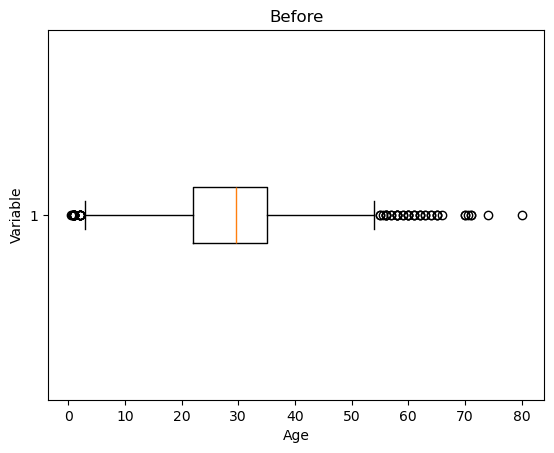

In [68]:
import matplotlib.pyplot as plt
plt.boxplot(df3['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Before')
plt.show()

In [70]:
# calculate summary statistics
mean = df3['age'].mean()
std  = df3['age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df4 = df3[(df3['age'] >= lower_bound)
                & (df3['age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


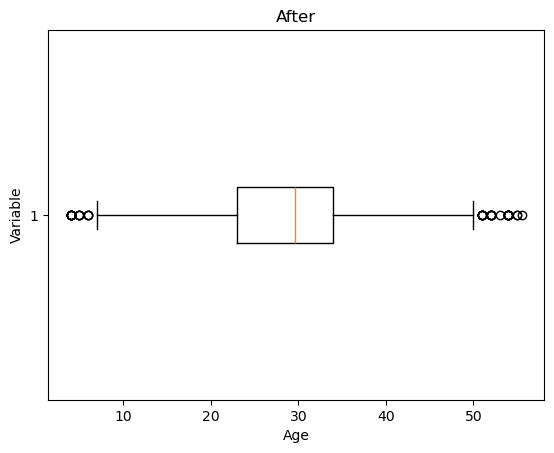

In [72]:
plt.boxplot(df4['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('After')
plt.show()

## 5. Transformación de datos

La transformación de datos implica convertir los datos de una forma a otra para hacerlos más adecuados para el análisis. Se pueden utilizar técnicas como la normalización, el escalado o la codificación para transformar los datos.

Validación y verificación de datos: La validación y verificación de datos implican asegurar que los datos sean precisos y consistentes comparándolos con fuentes externas o conocimientos de expertos. Para la predicción con aprendizaje automático, primero separamos las características independientes y las variables objetivo. Aquí consideraremos solo ‘Sexo’, ‘Edad’, ‘SibSp’, ‘Parch’, ‘Tarifa’ y ‘Embarque’ como las características independientes y ‘Sobrevivió’ como la variable objetivo. Porque el ID del pasajero no afectará la tasa de supervivencia.

In [75]:
X = df3[['pclass','sex','age', 'sibsp','parch','fare','embarked']]
Y = df3['survived'] 

In [77]:

X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Formato de datos: El formato de datos implica convertir los datos en un formato o estructura estándar que pueda ser fácilmente procesado por los algoritmos o modelos utilizados para el análisis. Aquí discutiremos las técnicas de formato de datos más comúnmente utilizadas, es decir, escalado y normalización. – Escalado: El escalado implica transformar los valores de las características a un rango específico. Mantiene la forma de la distribución original mientras cambia la escala. El escalado es particularmente útil cuando las características tienen diferentes escalas y ciertos algoritmos son sensibles a la magnitud de las características. Los métodos comunes de escalado incluyen el escalado Min-Max y la estandarización (escalado Z-score). Escalado Min-Max:

El escalado Min-Max reescala los valores a un rango especificado, típicamente entre 0 y 1. Preserva la distribución original y asegura que el valor mínimo se mapee a 0 y el valor máximo se mapee a 1.

In [81]:
from sklearn.preprocessing import MinMaxScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\ingeo\AppData\Local\Temp\ipykernel_8544\3649388838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
